In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

(-0.5, 255.5, 255.5, -0.5)

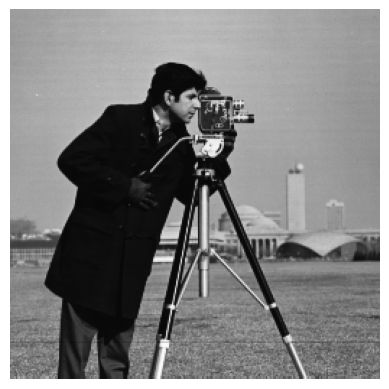

In [ ]:
img = cv2.imread("/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/IMG/cameraman.png")
plt.imshow(img)
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

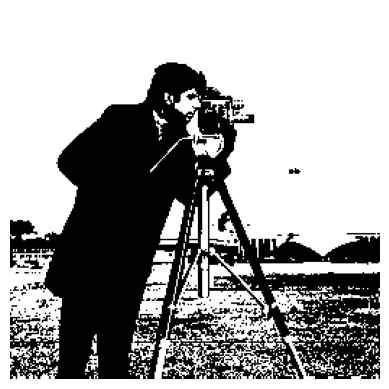

In [ ]:
# cắt ngưỡng toàn cục
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1)
plt.axis('off')


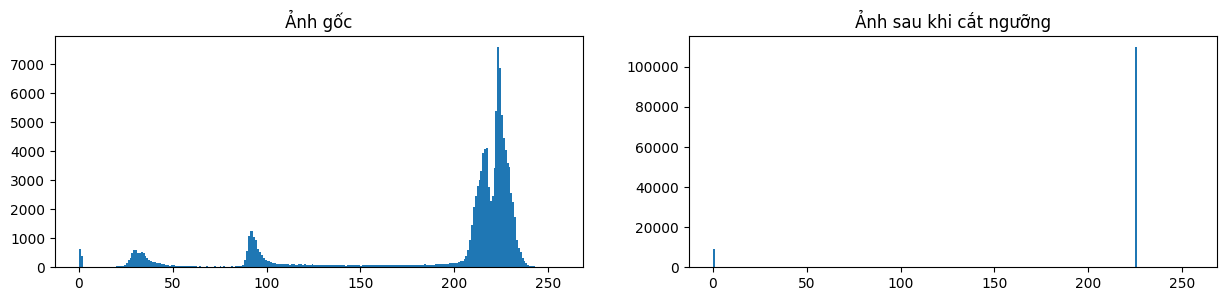

<Figure size 640x480 with 0 Axes>

In [ ]:
# vẽ biểu đồ histogram
fx,ax = plt.subplots(1,2,figsize = (15,3))
ax[0].hist(img.ravel(), 256, [0, 256])
ax[1].hist(thres_high.ravel(), 256, [0, 256])

# ax[0].xlabel('Giá tị pixel img')
ax[0].set_title('Ảnh gốc')
ax[1].set_title('Ảnh sau khi cắt ngưỡng')

# ax[1].xlabel('T')
plt.show()
plt.tight_layout()

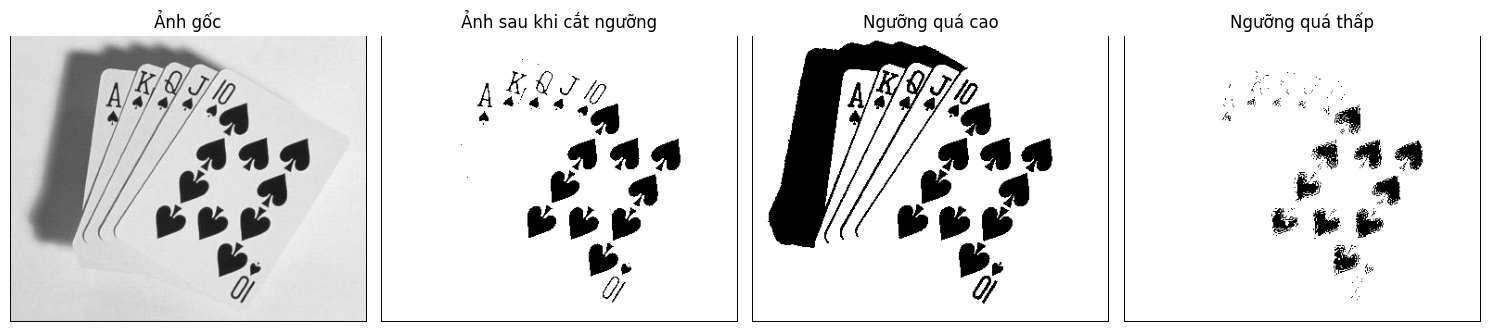

In [ ]:
def phan_doan_bang_cat_nguong(img,nguong): # Định nghĩa hàm phân đoạn bằng cắt ngưỡng
    m, n= img.shape
    img_phan_doan_cat_nguong = np.zeros([m, n])
    for i in range(m):
      for j in range(n):
          if (img[i,j] < nguong):
                img_phan_doan_cat_nguong [i,j] = 0
          else:
                img_phan_doan_cat_nguong[i,j] = 225 # tương đương gt 1 trong công thức 1
    return img_phan_doan_cat_nguong

img = cv2.imread("/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/IMG/A.png", 0)
thres_mean = phan_doan_bang_cat_nguong(img,img.mean())
thres_high = phan_doan_bang_cat_nguong(img,80)
thres_low = phan_doan_bang_cat_nguong(img,35)
fx,ax = plt.subplots(1,4,figsize = (15,15))
ax[0].imshow(img,cmap = 'gray')
ax[1].imshow(thres_high,cmap = 'gray')
ax[2].imshow(thres_mean,cmap = 'gray')
ax[3].imshow(thres_low,cmap = 'gray')
ax[0].set_title('Ảnh gốc')
ax[1].set_title('Ảnh sau khi cắt ngưỡng')
ax[2].set_title('Ngưỡng quá cao')
ax[3].set_title('Ngưỡng quá thấp')
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')
plt.tight_layout()


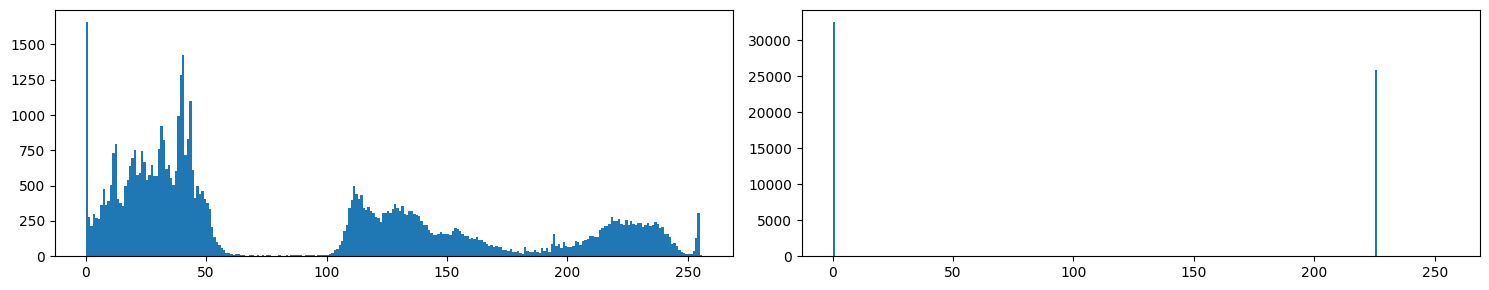

In [ ]:
fx,ax = plt.subplots(1,2,figsize = (15,3))
ax[0].hist(img.ravel(), 256, [0, 256])
ax[1].hist(thres_img.ravel(), 256, [0, 256])
plt.tight_layout()

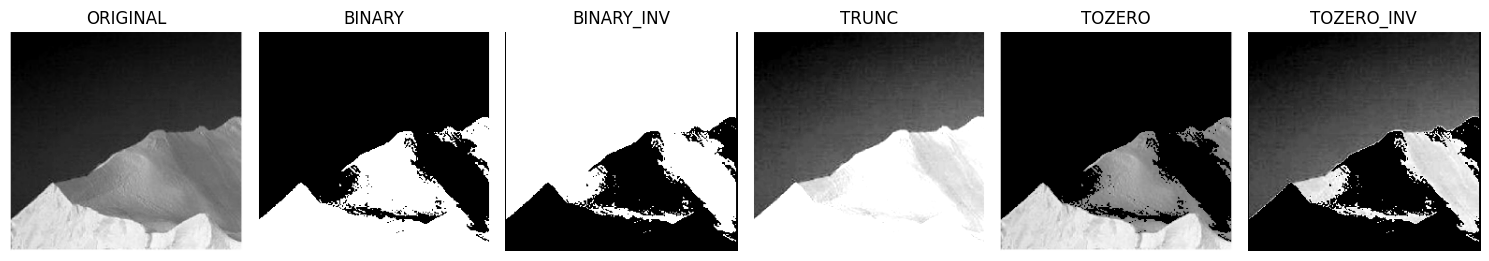

In [ ]:
#Simple thres
img = cv2.imread("/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/IMG/moun.png", 0)
thres1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
thres2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
thres3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
thres4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
thres5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

fx,ax = plt.subplots(1,6,figsize = (15,3))
ax[0].imshow(img,cmap='gray')
ax[1].imshow(thres1[1],cmap = 'gray')
ax[2].imshow(thres2[1],cmap = 'gray')
ax[3].imshow(thres3[1],cmap = 'gray')
ax[4].imshow(thres4[1],cmap = 'gray')
ax[5].imshow(thres5[1],cmap = 'gray')
ax[0].set_title('ORIGINAL')
ax[1].set_title('BINARY')
ax[2].set_title('BINARY_INV')
ax[3].set_title('TRUNC')
ax[4].set_title('TOZERO')
ax[5].set_title('TOZERO_INV')
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')
ax[4].axis('off')
ax[5].axis('off')
plt.tight_layout()

(-0.5, 248.5, 234.5, -0.5)

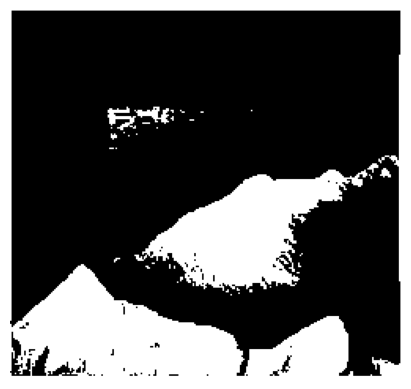

In [ ]:
img = cv2.imread("/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/IMG/moun.png", 0)
dst = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 127, 2)
plt.imshow(dst,cmap = 'gray')
plt.axis('off')

# Mutile level

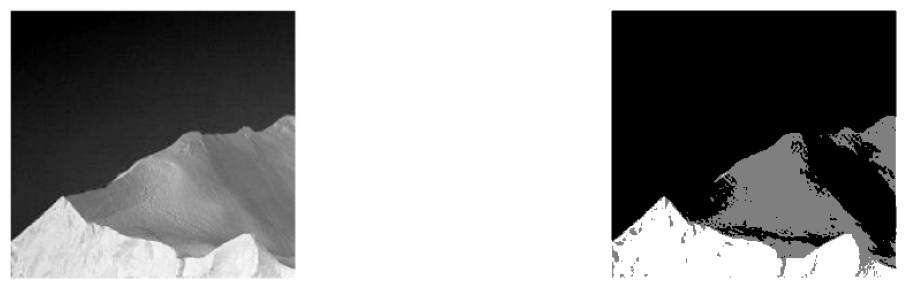

In [ ]:
def phan_doan_bang_cat_nguong_multi_level(img,t1,t2):
  m,n = img.shape
  img_phan_doan_cat_nguong = np.zeros([m,n])
  for i in range(m):
    for j in range(n):
      if (img[i,j] < t1):
        img_phan_doan_cat_nguong[i,j] = 0
      elif (img[i,j] < t2):
        img_phan_doan_cat_nguong[i,j] = 127
      else:
        img_phan_doan_cat_nguong[i,j] = 255
  return img_phan_doan_cat_nguong
img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/IMG/moun.png',0)
fx,ax = plt.subplots(1,2,figsize = (15,3))
ax[0].imshow(img,cmap = 'gray')
ax[1].imshow(phan_doan_bang_cat_nguong_multi_level(img,127,200),cmap = 'gray')
ax[0].axis('off')
ax[1].axis('off')
plt.tight_layout()

#Tìm ngưỡng toàn cục  phù hợp


In [ ]:

def nguong_toan_cuc(img):
  img_copy = img.copy()
  t = np.mean(img)
  g1=[]
  g2 = []
  while(True):
    for i in range (img_copy.shape[0]):
      for j in range (img_copy.shape[1]):
        if (img_copy[i,j] < t):
          g1.append(img_copy[i,j])

        else:
          g2.append(img_copy[i,j])
    m1 = np.mean(g1)
    m2 = np.mean(g2)

    t0 = (m1+m2)/2
    delta_t = abs(t - t0)
    if (delta_t < 1):
      break
    t = t0
    g1.clear()
    g2.clear()
  return t0
img = cv2.imread("/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/IMG/moun.png", 0)
print(nguong_toan_cuc(img))



97.2889471817028


(-0.5, 248.5, 234.5, -0.5)

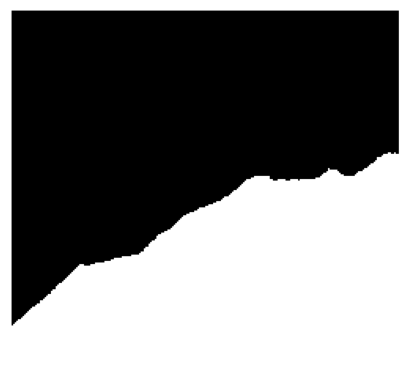

In [ ]:
thres_img = phan_doan_bang_cat_nguong(img,nguong_toan_cuc(img))
plt.imshow(thres_img,cmap = 'gray')
plt.axis('off')

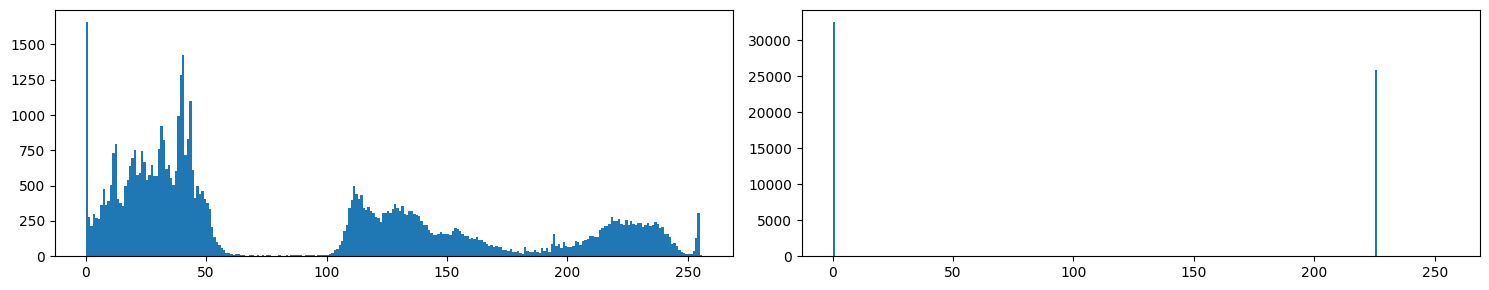

In [ ]:
fx,ax = plt.subplots(1,2,figsize = (15,3))
ax[0].hist(img.ravel(), 256, [0, 256])
ax[1].hist(thres_img.ravel(), 256, [0, 256])
plt.tight_layout()